# 0. Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

from prophet import Prophet

# 1. Import Data

In [2]:
df = pd.read_csv('avocado.csv', index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Date']).reset_index(drop=True)

In [3]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


# 2. Data Visulization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


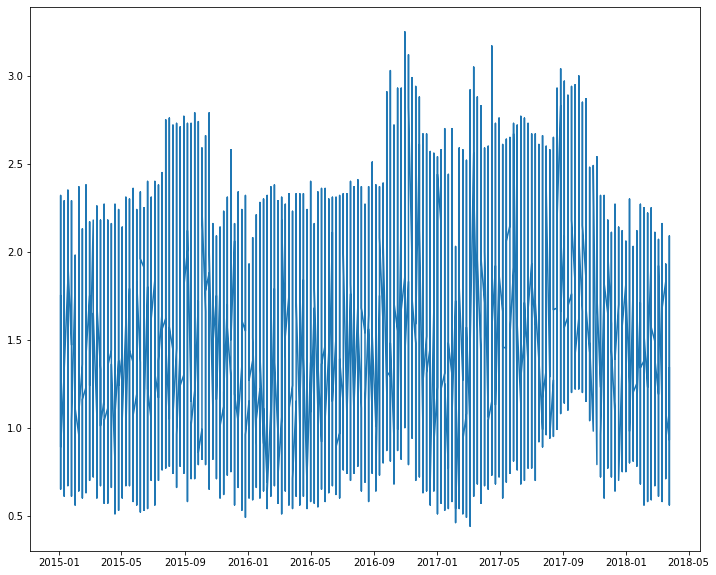

In [6]:
plt.figure(figsize=(12,10))
plt.plot(df['Date'], df['AveragePrice'])
plt.show()

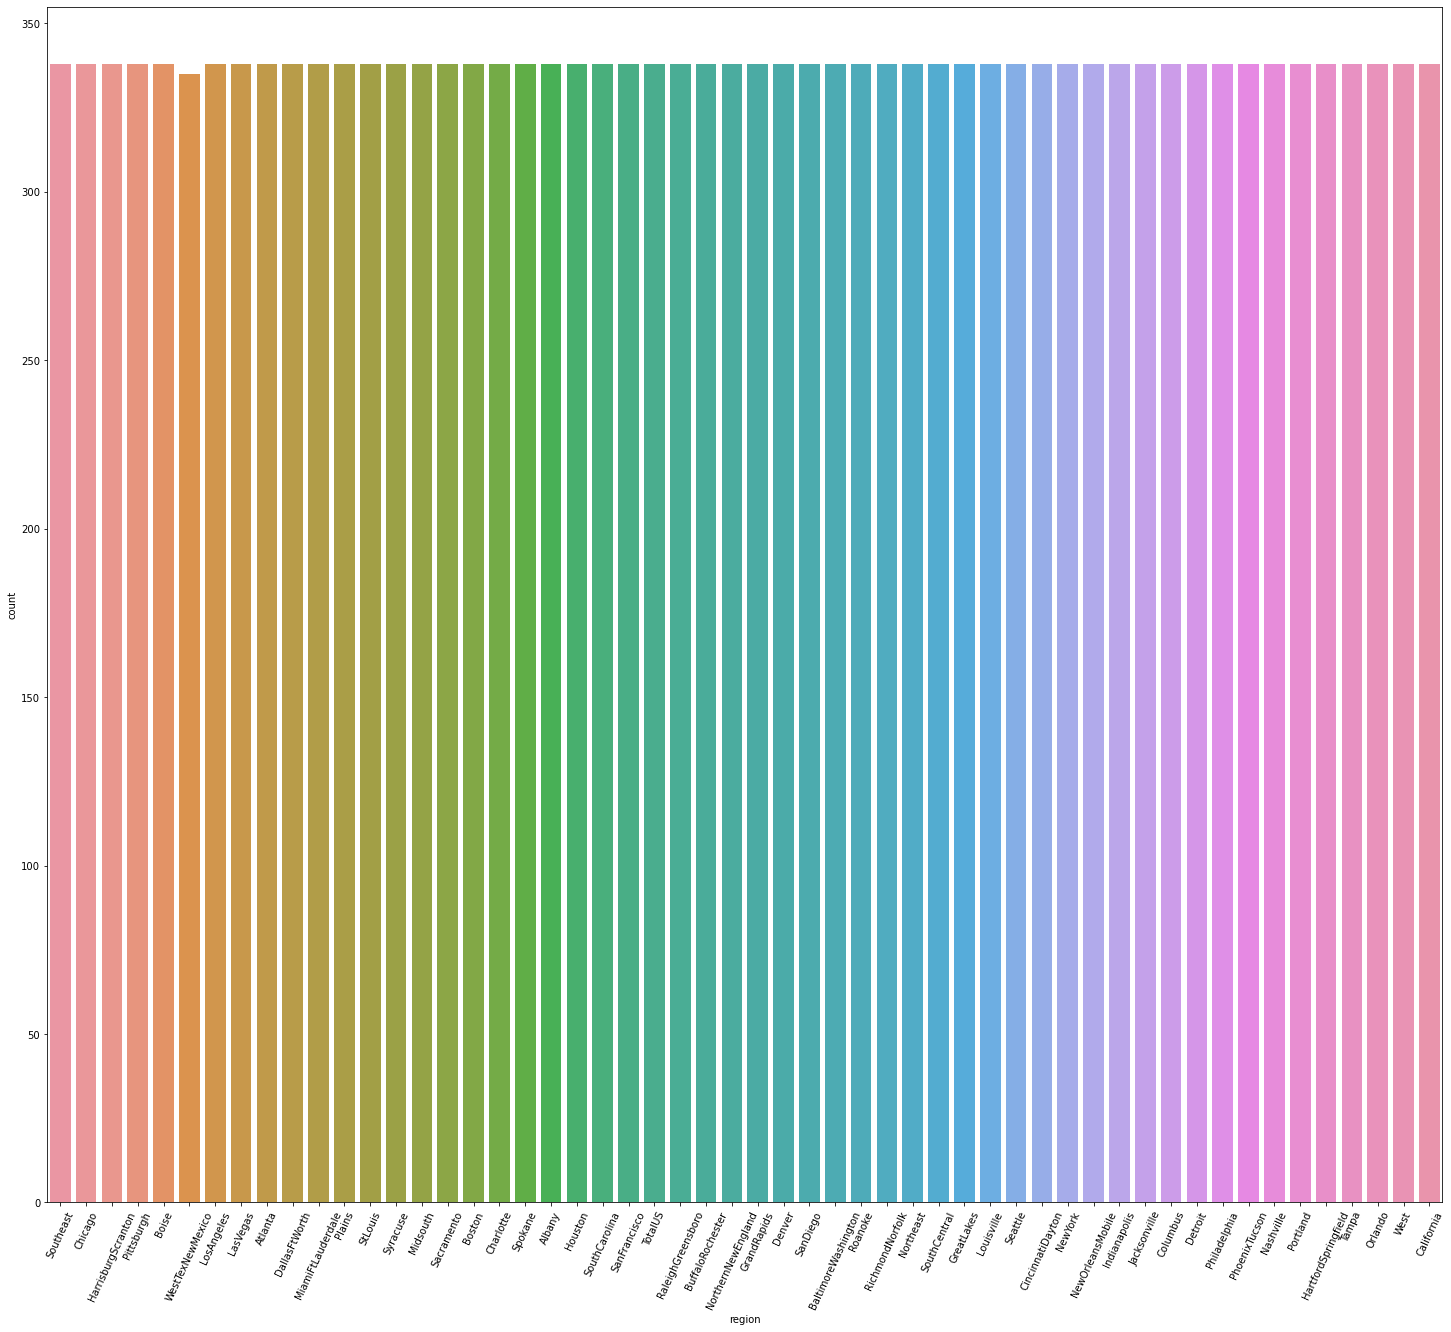

In [10]:
plt.figure(figsize=(25,22))
sns.countplot(data = df, x = 'region')
plt.xticks(rotation = 65)
plt.show()

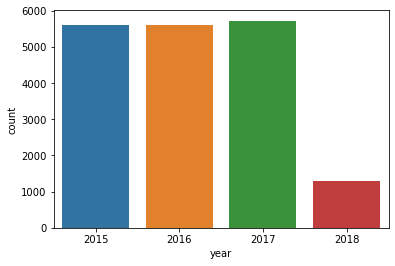

In [13]:
sns.countplot(data = df, x = 'year')
plt.show()

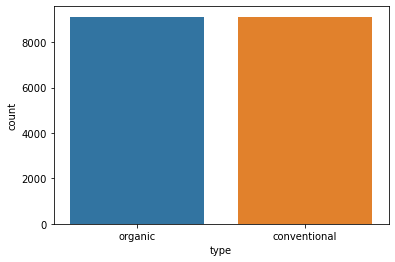

In [14]:
sns.countplot(data = df, x = 'type')
plt.show()

In [15]:
df_prophet = df[['Date', 'AveragePrice']]
df_prophet

,Date,AveragePrice
0,2015-01-04,1.75
1,2015-01-04,1.49
2,2015-01-04,1.68
3,2015-01-04,1.52
4,2015-01-04,1.64
...,...,...
18244,2018-03-25,1.36
18245,2018-03-25,0.70
18246,2018-03-25,1.42
18247,2018-03-25,1.70


# 3. Make Prediction

In [16]:
df_prophet = df_prophet.rename(columns={"Date": "ds", "AveragePrice": "y"})

In [ ]:
m = Prophet()
m.fit(df_prophet)

In [18]:
future = m.make_future_dataframe(periods=365)

In [ ]:
forecast = m.predict(future)

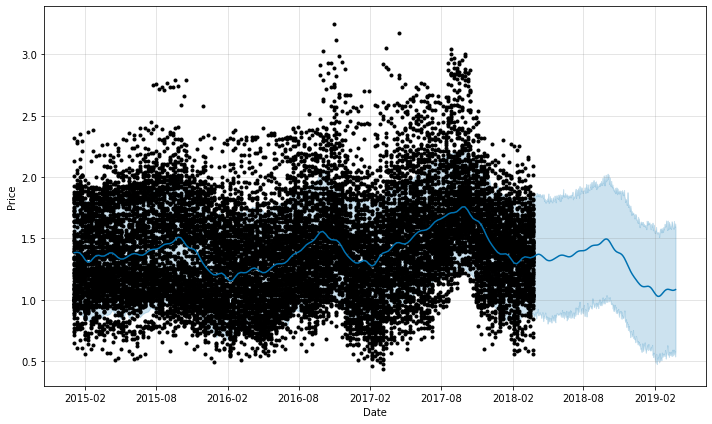

In [20]:
figure = m.plot(forecast, xlabel = 'Date', ylabel='Price')

c:\Users\Esra\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


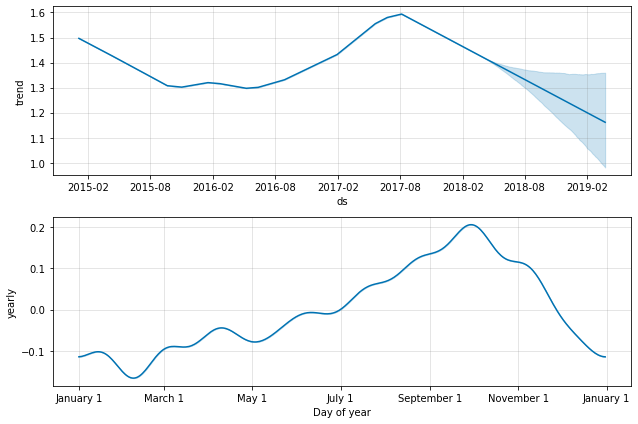

In [21]:
figure = m.plot_components(forecast)

### Region Specific

In [33]:
df_sample = df[df['region'] == "West"]
df_sample.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
91,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
107,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
171,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
179,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
267,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


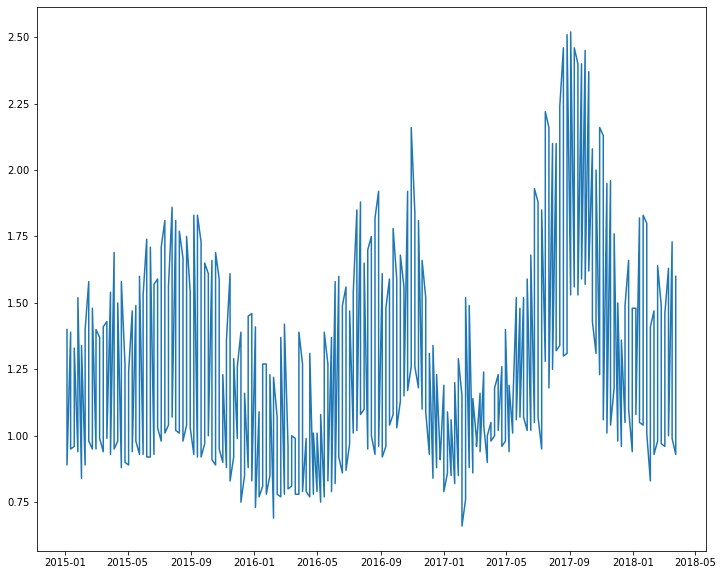

In [34]:
plt.figure(figsize=(12,10))
plt.plot(df_sample['Date'], df_sample['AveragePrice'])
plt.show()

In [36]:
df_sample_prophet = df_sample.rename(columns={"Date": "ds", "AveragePrice": "y"})

In [37]:
df_sample_prophet.head()

,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
91,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
107,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
171,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
179,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
267,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


In [ ]:
m = Prophet()
m.fit(df_sample_prophet)

In [39]:
future = m.make_future_dataframe(periods=365)

In [ ]:
forecast = m.predict(future)

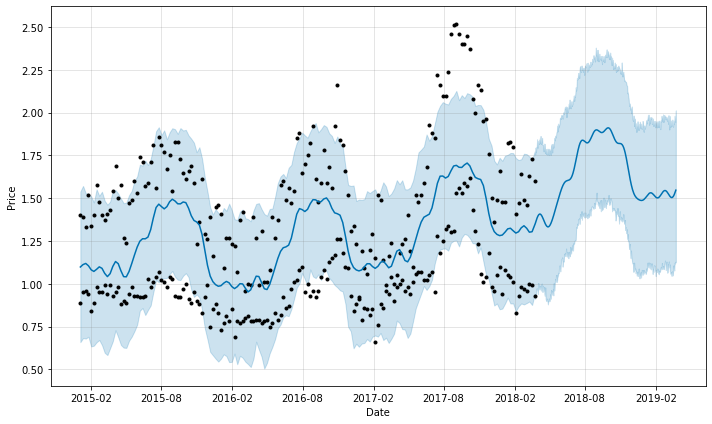

In [41]:
figure = m.plot(forecast, xlabel = 'Date', ylabel='Price')

c:\Users\Esra\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


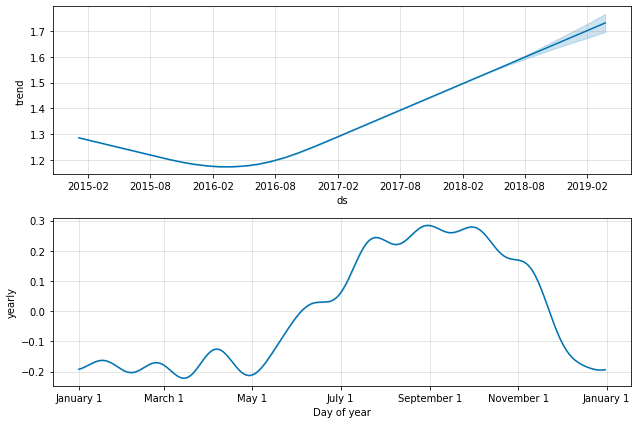

In [42]:
figure = m.plot_components(forecast)